In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

## Diccionario de campos
- Make	     Marca del vehículo
- Model	     Modelo del vehículo
- Price USD	 Precio del vehículo en dólares estadounidenses
- Year_a	 Año de fabricación del vehículo
- sale	     Fecha de venta del vehículo
- Kilometer	 Kilometraje del vehículo
- Fuel Type	 Tipo de combustible del vehículo
- Transmission	Transmisión del vehículo
- Color	     Color del vehículo
- Owner_a	 Propietario anterior del vehículo
- Seller Type	Tipo de vendedor del vehículo
- Engine	 Motor del vehículo
- Max Power	 Potencia máxima del vehículo
- Max Torque	Par máximo del vehículo
- Drivetrain	Sistema de tracción del vehículo
- Length_a	 Longitud del vehículo
- Width	     Anchura del vehículo
- Height	 Altura del vehículo
- Seating Capacity	Capacidad de asientos del vehículo
- Fuel Tank Capacity	Capacidad de fulleado en Galones

In [2]:
data = pd.read_csv("Depuracion_Auto_Tech1.csv")
data.head()

,Make,Model,sale,Fuel Type,Transmission,Color,Owner_a,Seller Type,Engine_a,Max Power,Max Torque,Drivetrain,Price USD,Kilometer,Length_a,Width,Height,Seating Capacity,Fuel Tank Capacity,Year_a
0,Honda,Amaze 1.2 VX i-VTEC,12/12/2019,Gasolina,Manual,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,6060.0,87150,3990.0,1680.0,1505.0,5.0,9.240,2017
1,Maruti Suzuki,Swift DZire VDI,9/10/2022,Diesel,Manual,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,5400.0,75000,3995.0,1695.0,1555.0,5.0,11.088,2014
2,Toyota,Glanza G,1/23/2021,Gasolina,Manual,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,9588.0,37500,3995.0,1745.0,1510.0,5.0,9.768,2019
3,Toyota,Innova 2.4 VX 7 STR [2016-2020],11/23/2019,Diesel,Manual,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,23400.0,69000,4735.0,1830.0,1795.0,7.0,14.520,2018
4,Maruti Suzuki,Ciaz ZXi,5/1/2018,Gasolina,Manual,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,8100.0,73315,4490.0,1730.0,1485.0,5.0,11.352,2017


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621 entries, 0 to 1620
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1621 non-null   object 
 1   Model               1621 non-null   object 
 2   sale                1621 non-null   object 
 3   Fuel Type           1621 non-null   object 
 4   Transmission        1621 non-null   object 
 5   Color               1621 non-null   object 
 6   Owner_a             1621 non-null   object 
 7   Seller Type         1621 non-null   object 
 8   Engine_a            1595 non-null   object 
 9   Max Power           1595 non-null   object 
 10  Max Torque          1595 non-null   object 
 11  Drivetrain          1587 non-null   object 
 12  Price USD           1621 non-null   float64
 13  Kilometer           1621 non-null   int64  
 14  Length_a            1604 non-null   float64
 15  Width               1604 non-null   float64
 16  Height

In [4]:
data[data.duplicated()]

,Make,Model,sale,Fuel Type,Transmission,Color,Owner_a,Seller Type,Engine_a,Max Power,Max Torque,Drivetrain,Price USD,Kilometer,Length_a,Width,Height,Seating Capacity,Fuel Tank Capacity,Year_a


Price USD
Sesgo : 4.67


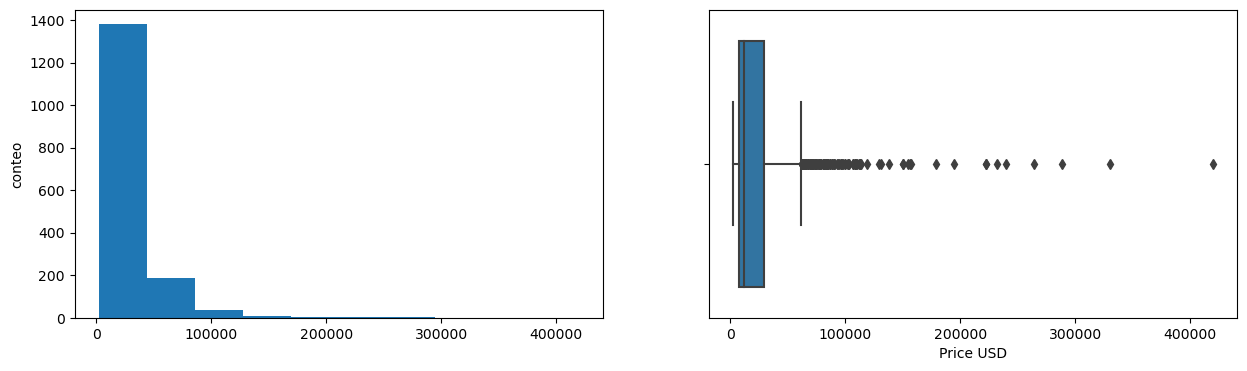

Kilometer
Sesgo : 21.68


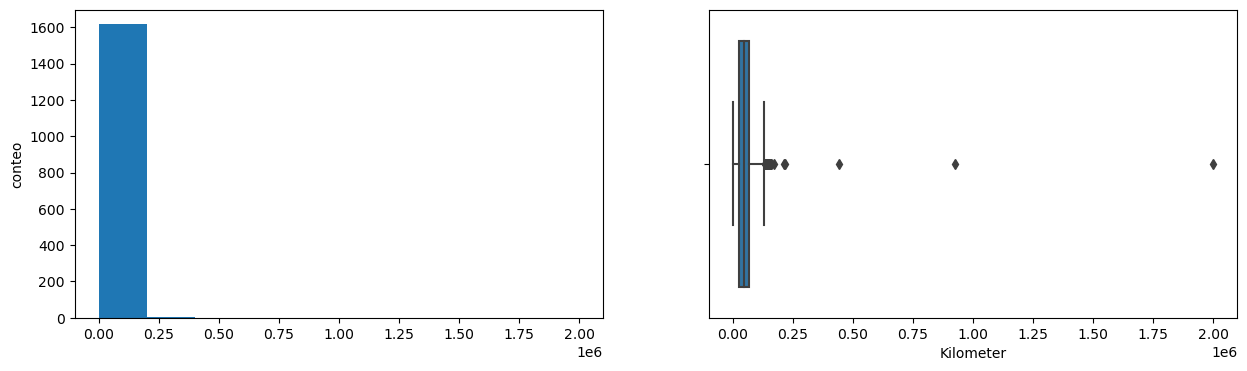

Length_a
Sesgo : -0.0


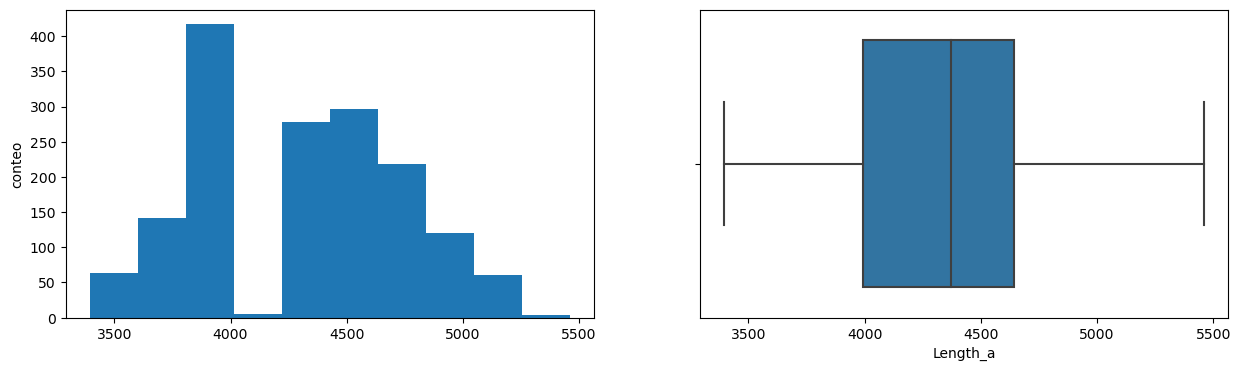

Width
Sesgo : 0.5


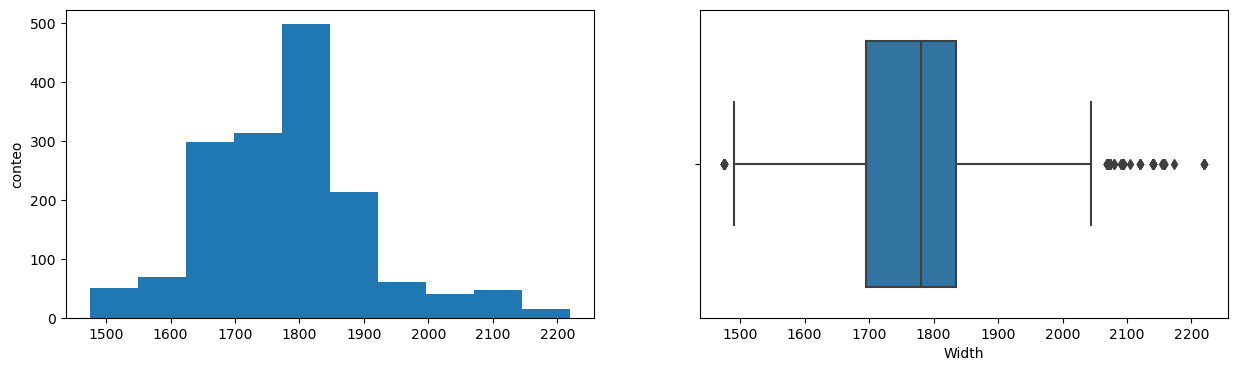

Height
Sesgo : 0.77


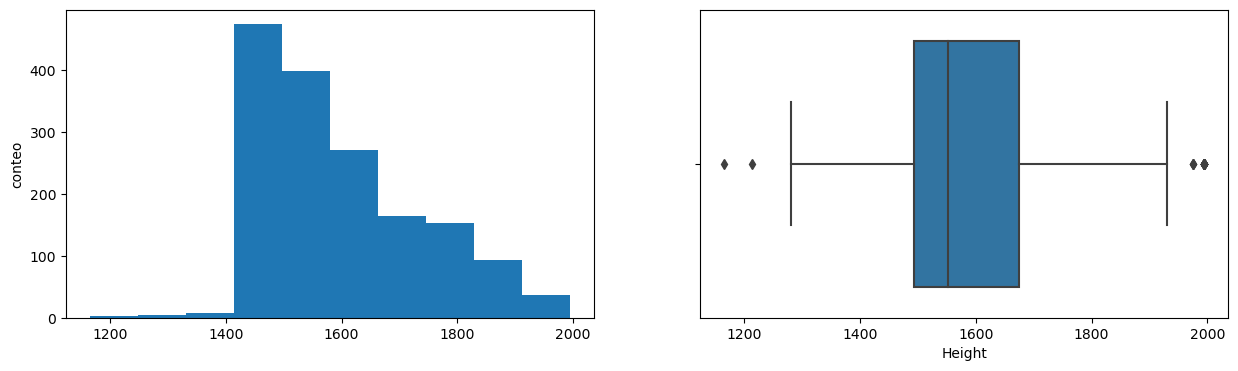

Seating Capacity
Sesgo : 1.39


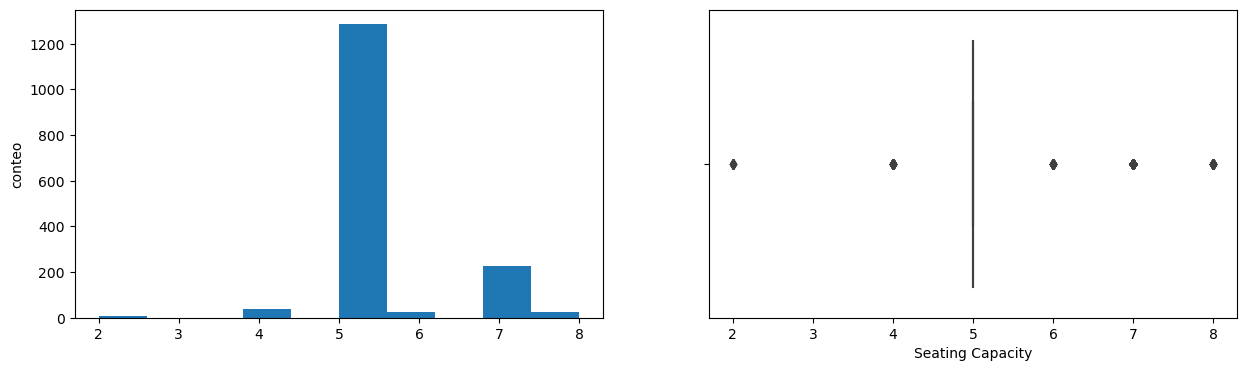

Fuel Tank Capacity
Sesgo : -0.08


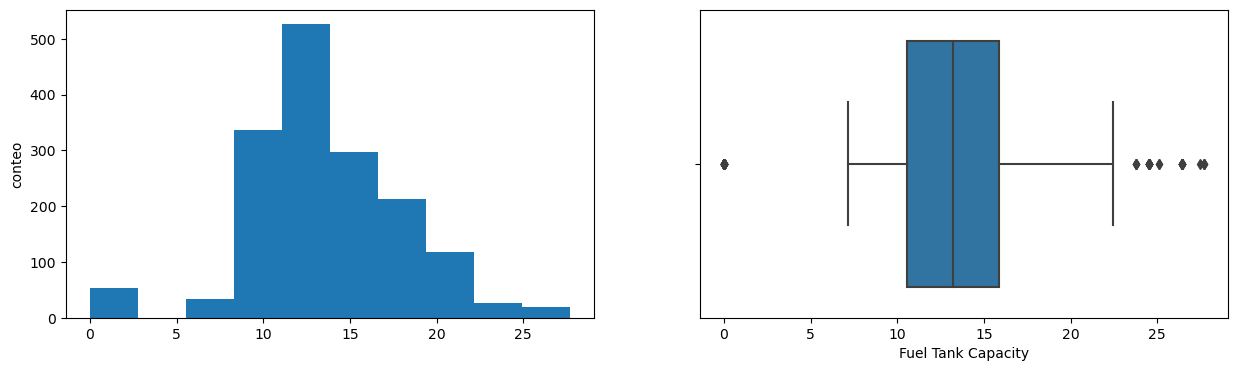

Year_a
Sesgo : 0.13


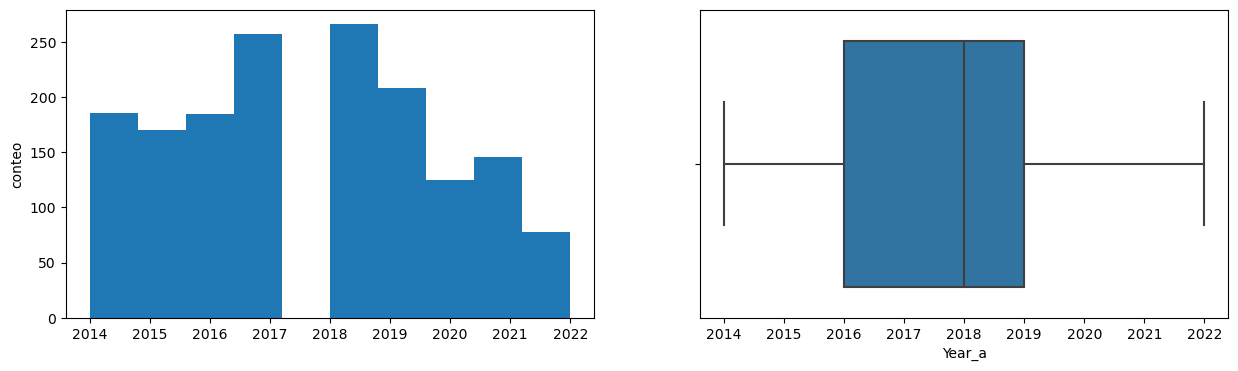

In [5]:
#EDA
for col in data.columns[12:]:
    print(col)
    
    print('Sesgo :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins = 10, grid=False)
    plt.ylabel('conteo')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

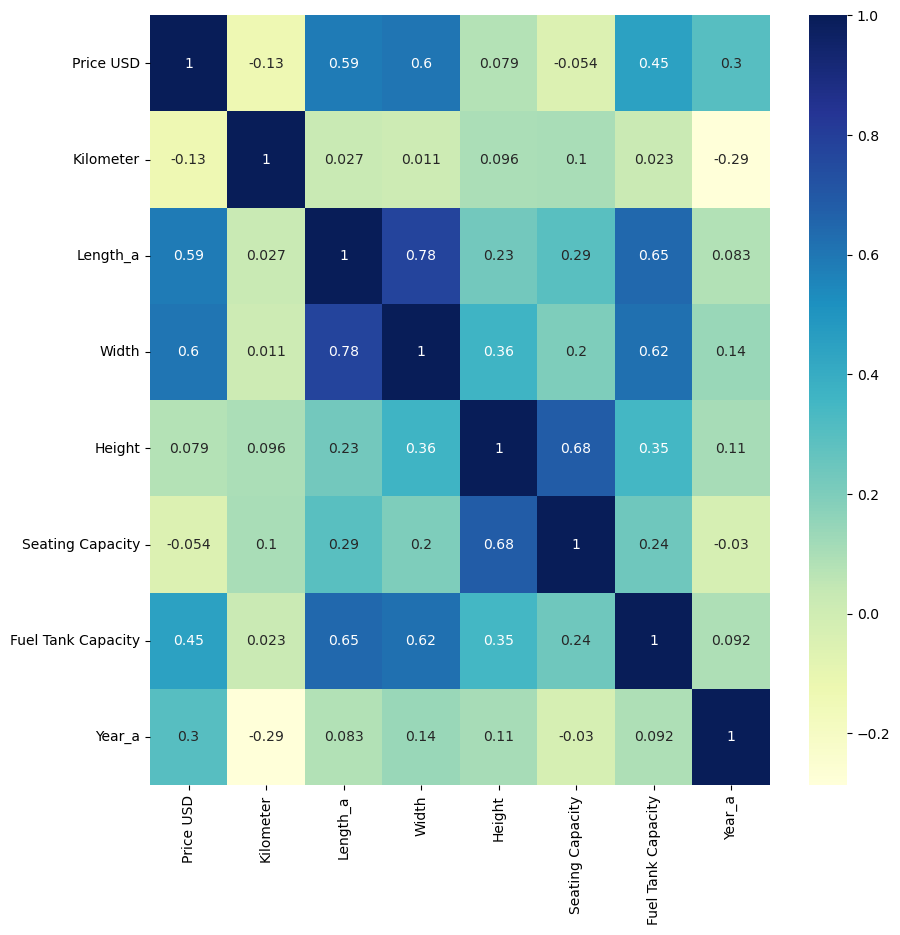

In [6]:
#Correlacion
plt.figure(figsize = (10,10))

columns_to_drop = ["Make", "Model", "sale ", "Fuel Type", "Transmission", "Color", "Owner_a", "Seller Type", "Engine_a", "Max Power", "Max Torque", "Drivetrain"]
data2 = data.drop(columns=columns_to_drop)

sns.heatmap(data2.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [7]:
#data2 = data.copy()
#from sklearn.preprocessing import LabelEncoder
# Lista de columnas a codificar
#columns_to_encode = ["Make", "Model", "sale ", "Fuel Type", "Transmission", "Color", 
 #                    "Owner_a", "Seller Type", "Engine_a", "Max Power", "Max Torque", "Drivetrain"]

# Codificación usando LabelEncoder
#label_encoder = LabelEncoder()
#for column in columns_to_encode:
 #   data2[column + '_Encoded'] = label_encoder.fit_transform(data2[column])

# Codificación usando One-Hot Encoding
#for column in columns_to_encode:
#    one_hot_encoded = pd.get_dummies(data2[column], prefix=column[:3])  # Usar las tres primeras letras como prefijo
#    data2 = pd.concat([data2, one_hot_encoded], axis=1)

# Eliminar las columnas originales que han sido codificadas
#data2.drop(columns=columns_to_encode, inplace=True)

In [8]:
scaler = StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data2), columns=data2.columns)
data_scaled.head()

,Price USD,Kilometer,Length_a,Width,Height,Seating Capacity,Fuel Tank Capacity,Year_a
0,-0.575651,0.604746,-0.771657,-0.820154,-0.662291,-0.376395,-0.906168,-0.255488
1,-0.597532,0.407224,-0.759684,-0.700580,-0.294800,-0.376395,-0.503861,-1.566080
2,-0.458685,-0.202415,-0.759684,-0.301998,-0.625542,-0.376395,-0.791223,0.618239
3,-0.000767,0.309681,1.012220,0.375591,1.469160,2.038556,0.243281,0.181375
4,-0.508018,0.379830,0.425576,-0.421572,-0.809288,-0.376395,-0.446388,-0.255488


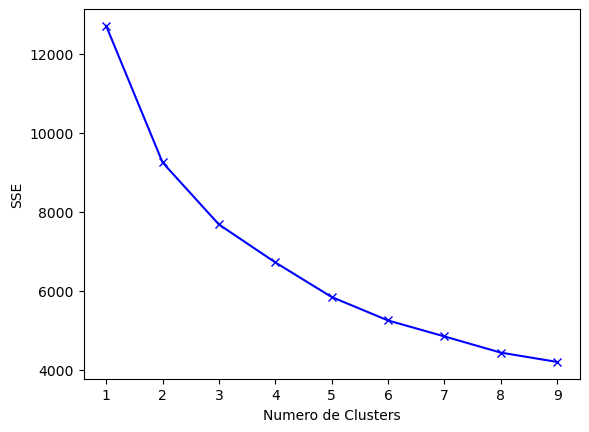

In [9]:
data2 = data_scaled.copy()
data2.dropna(how="any", inplace=True)

#Calculo de la linea Elbow para determinar el numero de clusters
sse = {} 


for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(data2)
    
    sse[k] = kmeans.inertia_

plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Numero de Clusters")

plt.ylabel("SSE")

plt.show()

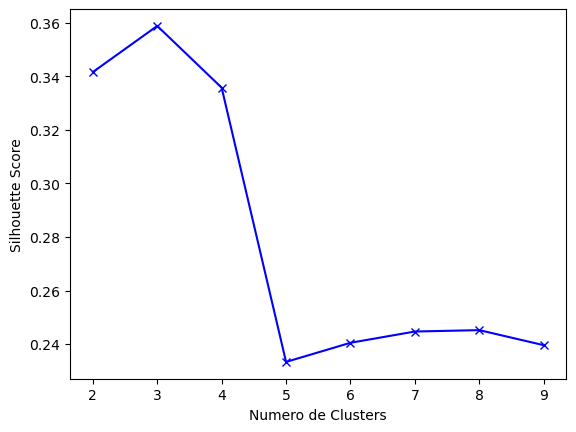

In [10]:
#Calculo de la silueta para tener una segunda opinion sobre el numero de clusters
sc = {} 

for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(data2)
    
    labels = kmeans.predict(data2)
    
    sc[k] = silhouette_score(data2, labels)

plt.figure()

plt.plot(list(sc.keys()), list(sc.values()), 'bx-')

plt.xlabel("Numero de Clusters")

plt.ylabel("Silhouette Score")

plt.show()

In [11]:
kmeans = KMeans(n_clusters = 3, random_state = 1)

kmeans.fit(data2)


data2['KMeans_Labels'] = kmeans.predict(data2)

In [12]:
data2['KMeans_Labels'].value_counts()

KMeans_Labels
0    1016
2     329
1     259
Name: count, dtype: int64

In [13]:
# Calcular la media y la mediana para cada grupo
mean = data2.groupby('KMeans_Labels').mean()
median = data2.groupby('KMeans_Labels').median()

# Concatenar los resultados, ignorando las filas adicionales en el caso de que haya menos grupos de los esperados
df_kmeans = pd.concat([mean, median], axis=0)

# Crear un DataFrame vacío con los índices deseados

df_kmeans.index=  ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 
               'group_0 Median', 'group_1 Median', 'group_2 Median'] 




df_kmeans.T



,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Price USD,-0.423574,0.097636,1.211521,-0.504039,-0.064024,0.874887
Kilometer,-0.013917,0.338169,-0.219622,-0.047973,0.114597,-0.314588
Length_a,-0.543044,0.750252,1.086375,-0.759684,0.916441,1.002642
Width,-0.499249,0.568788,1.093984,-0.421572,0.455308,0.766202
Height,-0.336302,1.566098,-0.194337,-0.552044,1.469160,-0.713740
Seating Capacity,-0.385903,2.085176,-0.449798,-0.376395,2.038556,-0.376395
Fuel Tank Capacity,-0.420537,0.624508,0.957809,-0.446388,0.530644,0.875478
Year_a,-0.107144,-0.034527,0.383209,-0.255488,-0.255488,0.618239


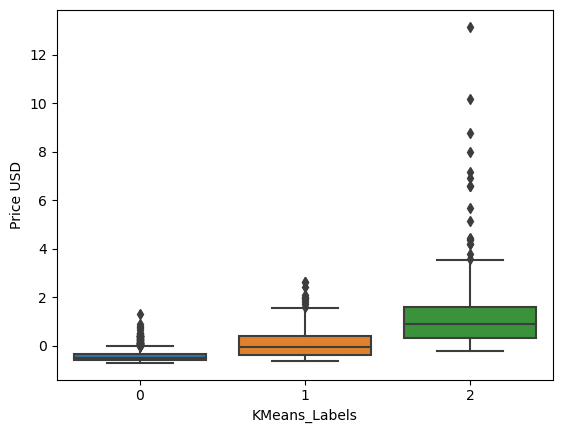

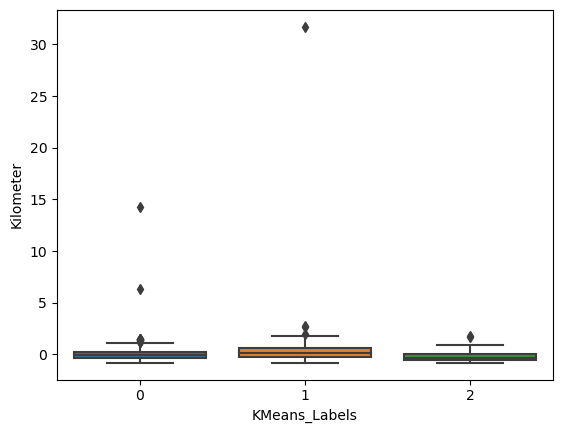

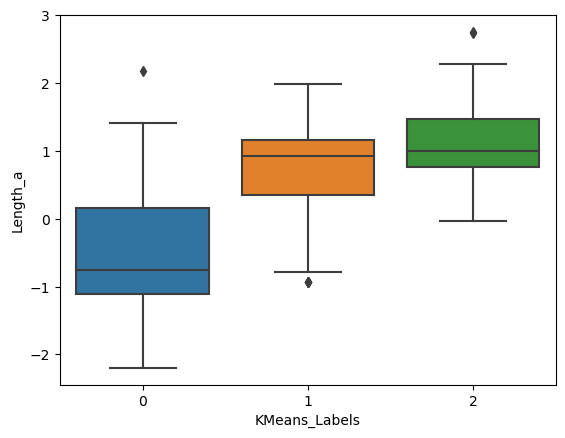

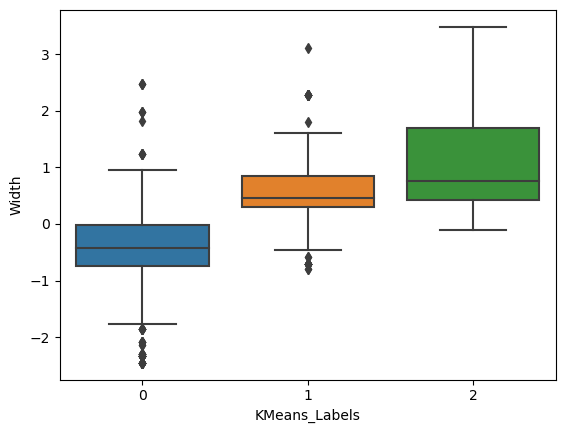

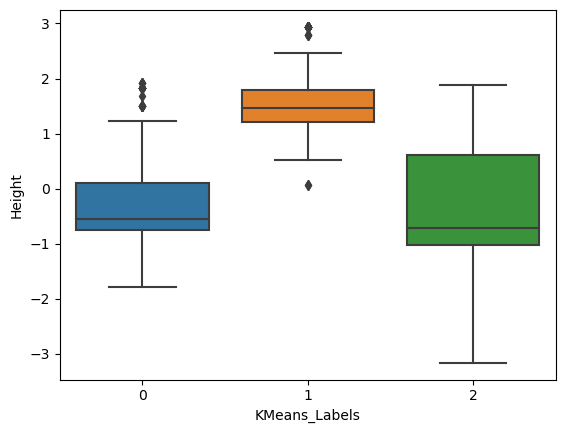

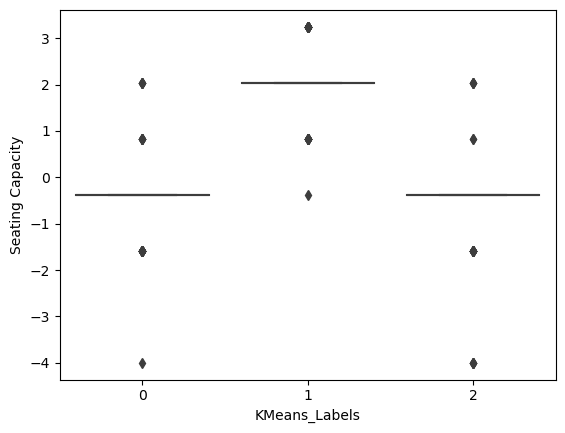

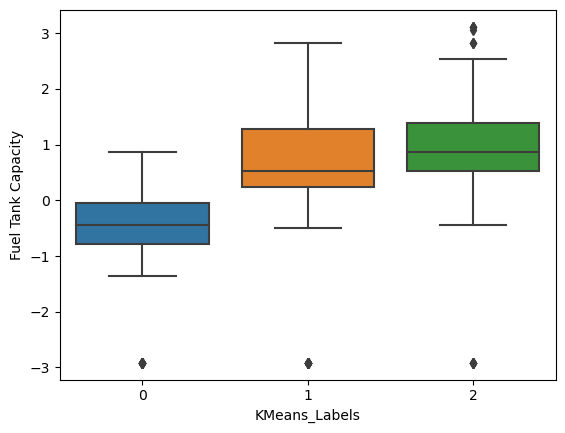

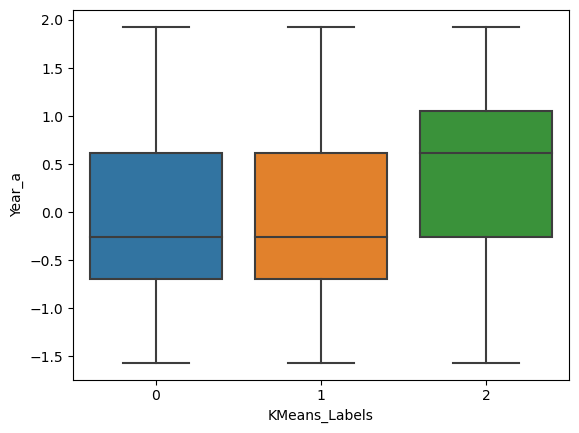

In [14]:
cols_visualise = ['Price USD', 'Kilometer', 'Length_a', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Year_a']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = data2)
    plt.show()

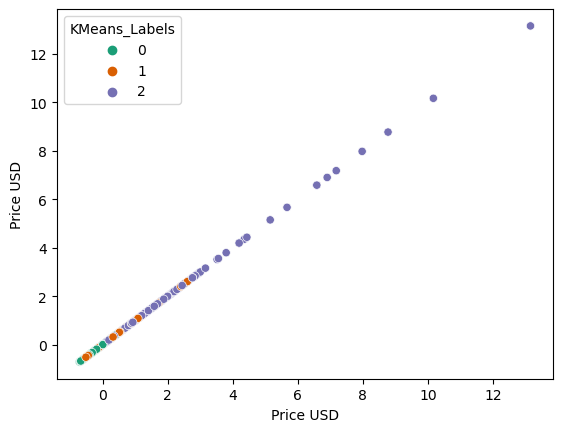

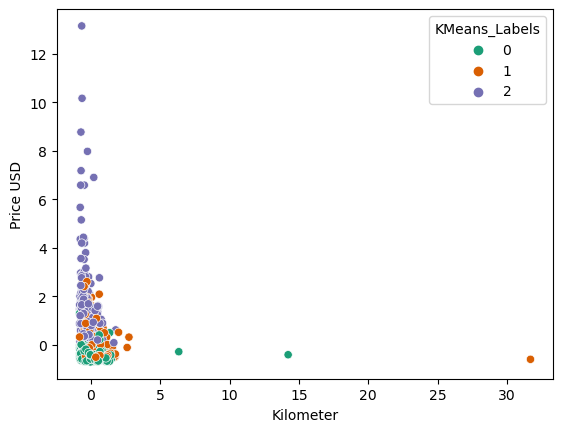

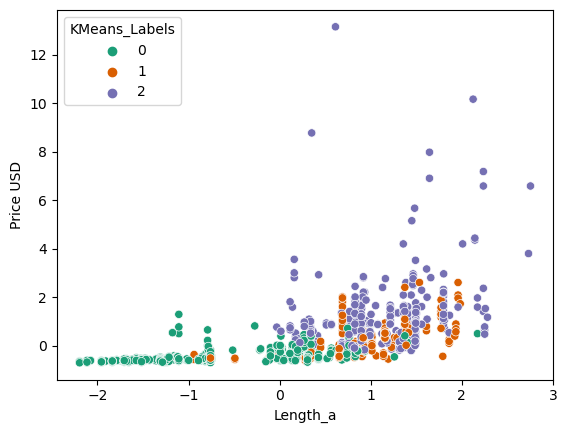

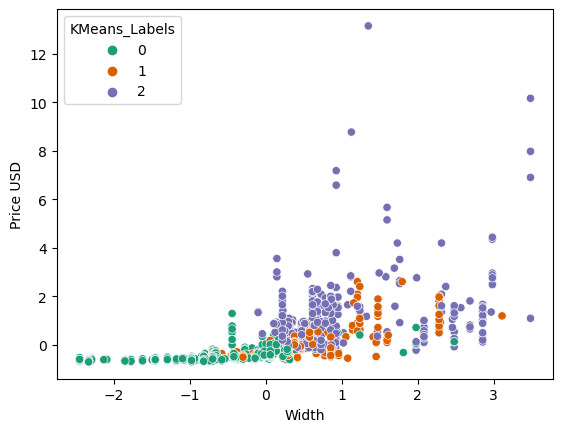

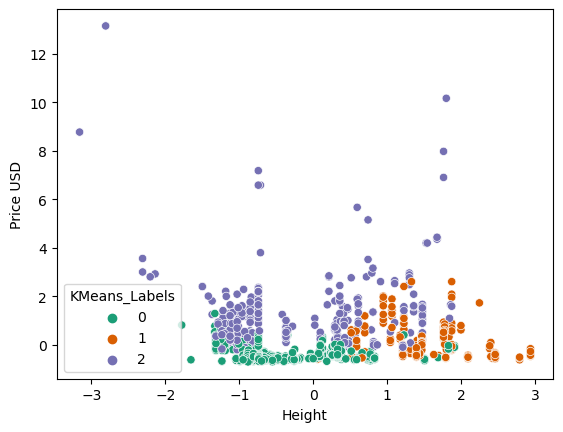

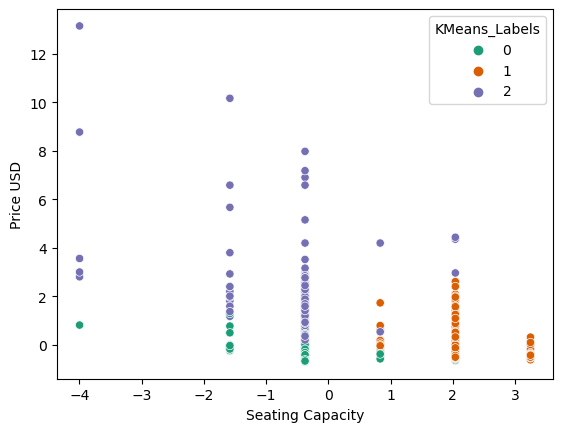

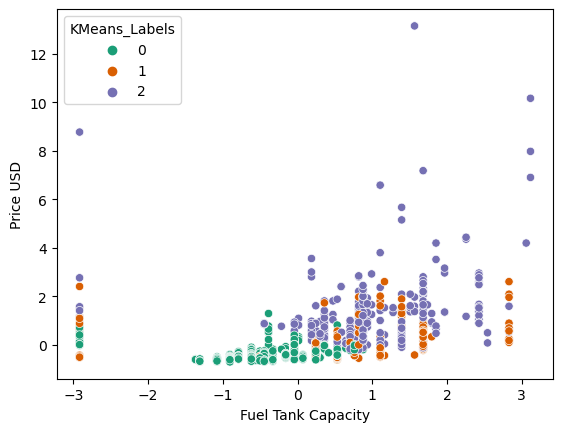

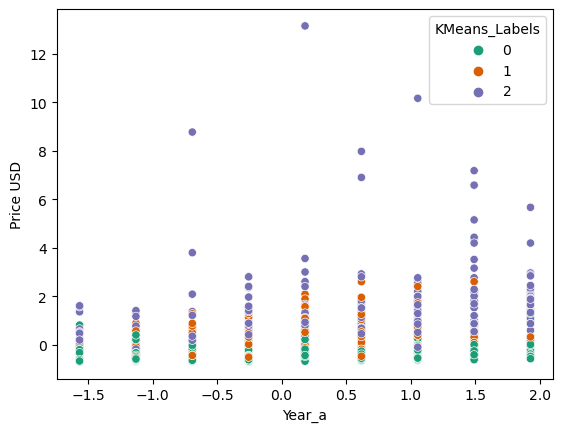

In [15]:


cols_visualise = ['Price USD', 'Kilometer', 'Length_a', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Year_a']

for col in cols_visualise:
    sns.scatterplot(x = col, y = 'Price USD', data = data2, hue = 'KMeans_Labels', palette = 'Dark2')
    
    plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame original
data3 = data_scaled.copy()
data3.dropna(how="any", inplace=True)
# Lista de columnas a codificar
#columns_to_encode = ["Make", "Model", "sale ", "Fuel Type", "Transmission", "Color", 
 #                    "Owner_a", "Seller Type", "Engine_a", "Max Power", "Max Torque", "Drivetrain"]

# Codificación usando LabelEncoder
#label_encoder = LabelEncoder()
#for column in columns_to_encode:
#    data3[column + '_Encoded'] = label_encoder.fit_transform(data3[column])

# Codificación usando One-Hot Encoding
#for column in columns_to_encode:
#    one_hot_encoded = pd.get_dummies(data3[column], prefix=column[:3])  # Usar las tres primeras letras como prefijo
#    data3 = pd.concat([data3, one_hot_encoded], axis=1)

# Eliminar las columnas originales que han sido codificadas
#data3.drop(columns=columns_to_encode, inplace=True)

# Mostrar las primeras filas del DataFrame resultante
#print(data3.head())

In [17]:

kmedo = KMedoids(n_clusters = 3, random_state = 1)

kmedo.fit(data3)

data3['kmedoLabels'] = kmedo.predict(data3)


In [18]:
data3.kmedoLabels.value_counts()

kmedoLabels
1    640
0    517
2    447
Name: count, dtype: int64

In [19]:
original_features =  ['Price USD', 'Kilometer', 'Length_a', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Year_a']

mean = data3.groupby('kmedoLabels').mean()

median = data3.groupby('kmedoLabels').median()

df_kmedoids = pd.concat([mean, median], axis = 0)

df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Price USD,-0.396096,0.658540,-0.499233,-0.468233,0.312336,-0.557748
Kilometer,-0.252660,-0.033216,0.342448,-0.275084,-0.129258,0.226478
Length_a,-0.660094,0.883401,-0.501361,-0.759684,0.900877,-0.759684
Width,-0.569610,0.851847,-0.560835,-0.389686,0.614740,-0.668693
Height,-0.325208,0.507756,-0.350853,-0.552044,0.587180,-0.552044
Seating Capacity,-0.303993,0.404691,-0.227824,-0.376395,-0.376395,-0.376395
Fuel Tank Capacity,-0.548105,0.836083,-0.452174,-0.503861,0.818006,-0.446388
Year_a,0.615704,0.214140,-1.000209,0.618239,0.181375,-1.129216


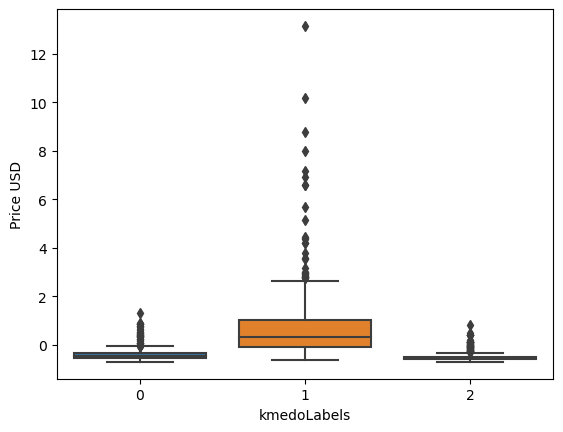

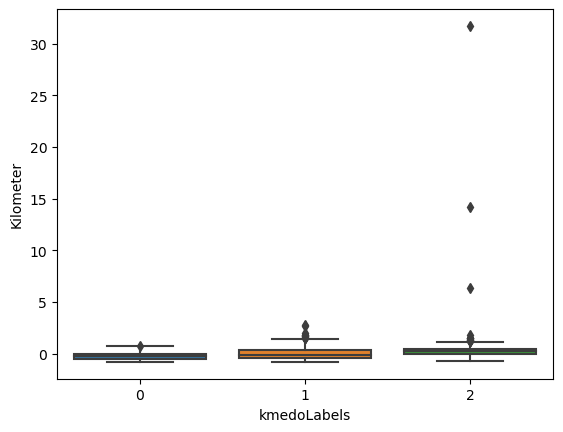

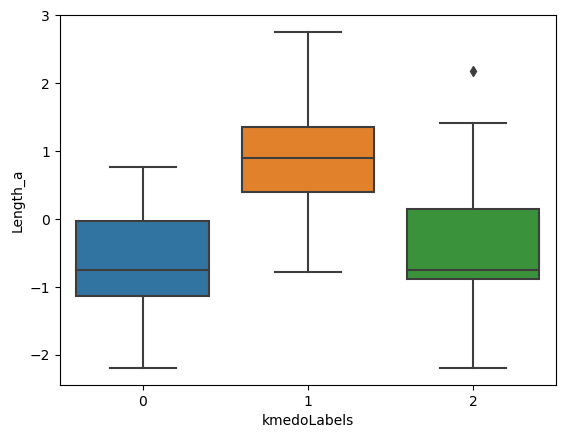

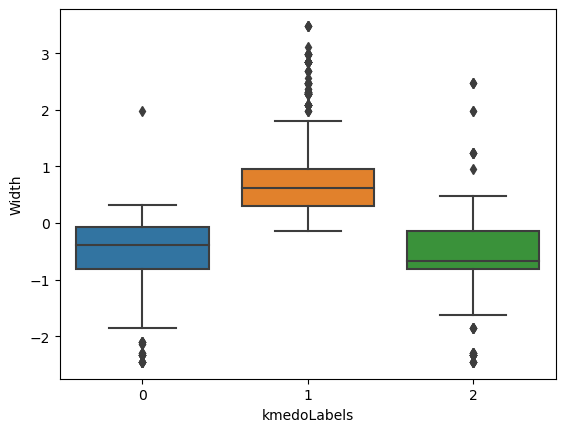

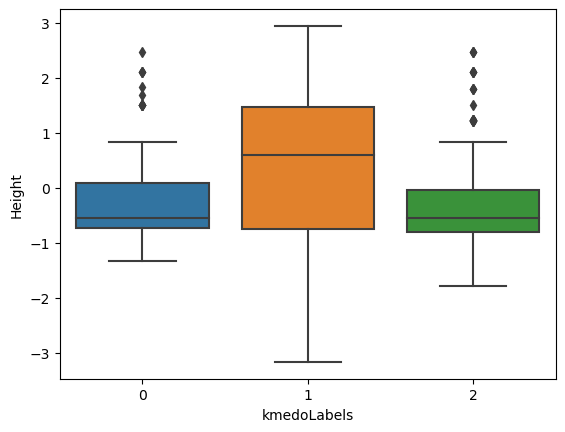

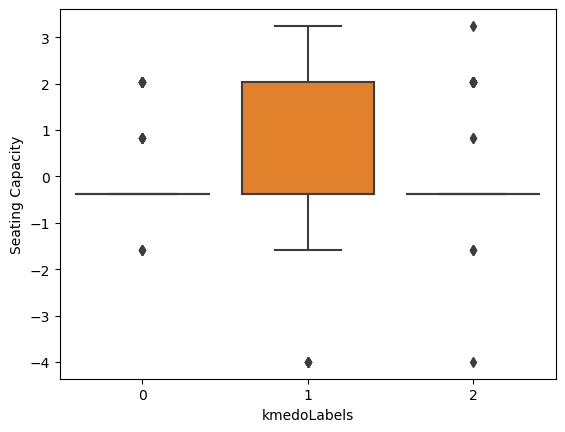

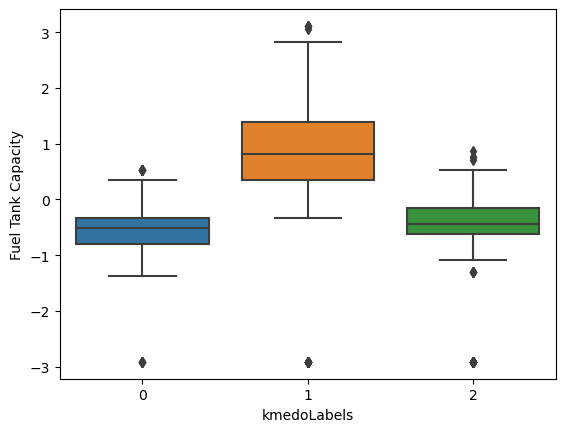

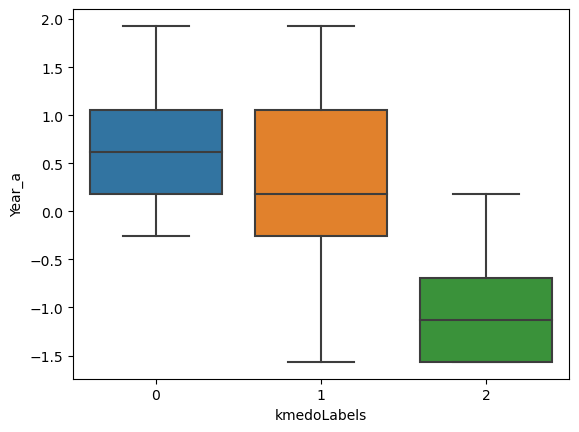

In [20]:
for col in cols_visualise:
    sns.boxplot(x = 'kmedoLabels', y = col, data = data3)
    
    plt.show()

In [21]:
data4 = data_scaled.copy()
data4.dropna(how="any", inplace=True)

gmm = GaussianMixture(n_components = 3, random_state = 1)

gmm.fit(data4)


data4['GmmLabels'] = gmm.predict(data4)

In [22]:
data4.GmmLabels.value_counts()

GmmLabels
0    1243
1     209
2     152
Name: count, dtype: int64

In [23]:
original_features =  ['Price USD', 'Kilometer', 'Length_a', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Year_a']

mean = data4.groupby('GmmLabels').mean()

median = data4.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Price USD,-0.171312,-0.069282,1.453600,-0.458287,-0.169851,0.884435
Kilometer,-0.060369,0.492728,-0.175993,-0.080487,0.147111,-0.291829
Length_a,-0.210583,0.783703,0.644480,-0.101206,0.916441,0.831438
Width,-0.190991,0.411979,0.995386,-0.278083,0.375591,1.120939
Height,-0.347845,1.550008,0.713288,-0.552044,1.469160,1.138418
Seating Capacity,-0.376395,2.067443,0.235287,-0.376395,2.038556,-0.376395
Fuel Tank Capacity,-0.091821,0.768233,0.020878,-0.331444,0.530644,0.530644
Year_a,-0.029149,-0.044373,0.353821,-0.255488,-0.255488,0.181375


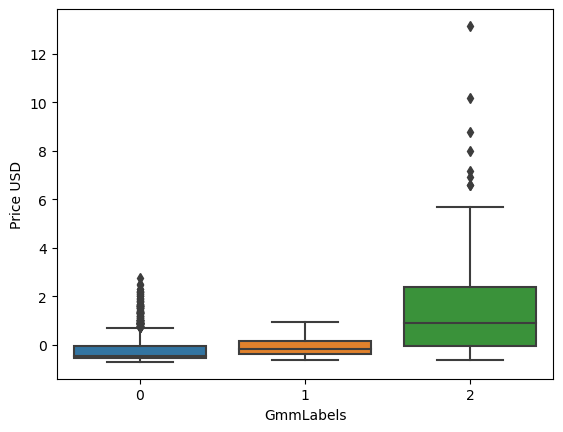

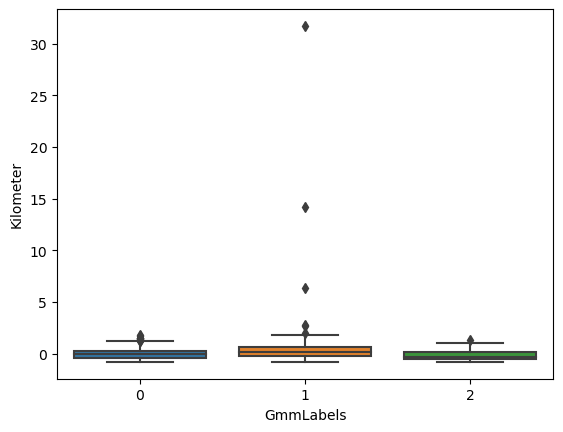

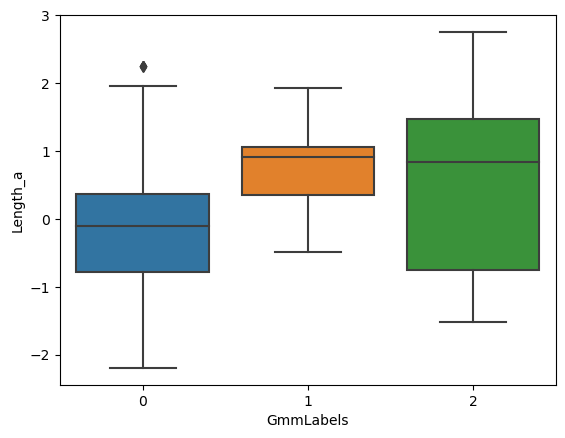

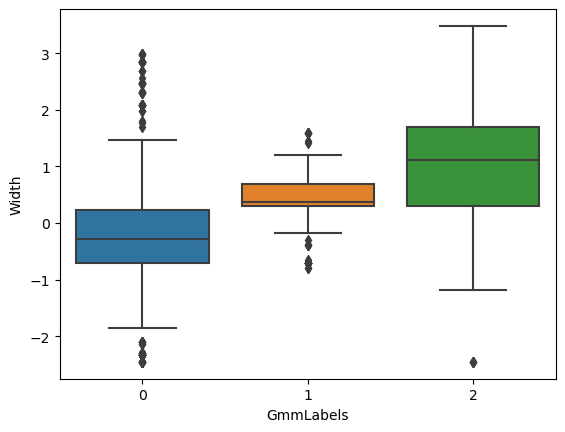

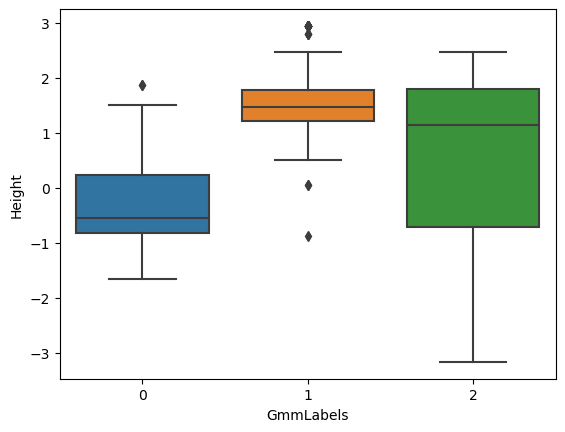

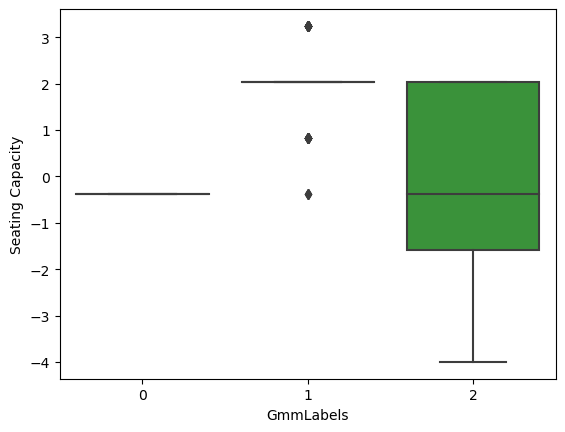

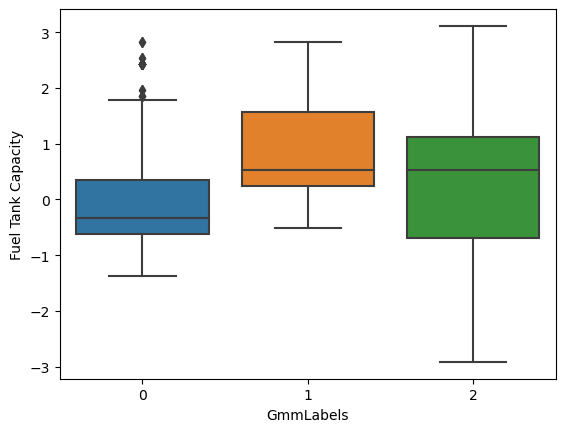

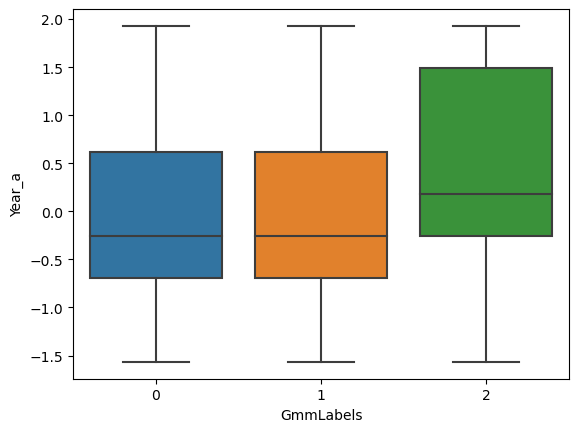

In [24]:
cols_visualise =  ['Price USD', 'Kilometer', 'Length_a', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Year_a']

for col in cols_visualise:
    sns.boxplot(x = 'GmmLabels', y = col, data = data4)
    
    plt.show()

## Conclusiones 
se confirma que la mejor segmentación de datos para 3 cluster es la de Kmedoids, 
kmedoLabels
1    640
0    517
2    447

KMeans_Labels
0    1016
2     329
1     259

GMM LABELS 
0    1243
1     209
2     152

mientras las otras dos se dispara la diferencia de la segmentacion de datos.
por la cual la mejor para la situacion es: Kmedoids.